# (Registration comparision)Volumetric_quantification

In this notebook, we start at raw MRI scans in native space, and then using ANTs [1] (antsRegistrationSyNQuick.sh) to transform them to SIGMA space [2].
The brain structure volumes are computed using thoes files as well as SIGMA atlas.

Reference:

[1] Avants, Brian B., Nick Tustison, and Gang Song. "Advanced normalization tools (ANTS)." Insight j 2.365 (2009): 1-35.

[2] Barrière, D. A., et al. "The SIGMA rat brain templates and atlases for multimodal MRI data analysis and visualization." Nature communications 10.1 (2019): 1-13.

**<font color='#FF000'> NOTE: </font>**

Registration step takes several hours per MRI volume/scan. To avoid long waiting, we recommend run ANTs on high-performance PC/server, rather than on Colab.

We recommend users to view/check [this notebook](https://drive.google.com/file/d/13oZcuAsJ4yQcZ5jGl5kYNV3DlW-eFgVB/view?usp=sharing), which provides ANTs transformed MRI scans for volumetric quantification in longitudinal studies.


---
<font size=5>Table of Contents</font>
* [Longitudinal Study Overview](#0)
* [1.0 Install ANTs in Colab](#1.0)
* [2.0 Download raw MRI data and BEN](#2.0)
* [3.0 ANTs registration via BEN interface](#3.0)
  * [3.1 BEN pipeline transform](#3.1)
  * [3.2 AFNI pipeline transform](#3.2)

  * [3.3 Visualization](#3.3)
* [4.0 Conclusion](#4.0)
---


<a name="0"></a>
#  Longitudinal Study Overview
Adolescent rats (3, 6, 9, and 12 weeks old)

**<font color='#FF000'> Conclusion: </font>**

Using ***BEN*** as the preprocessing pipeline before registration can observe the development of brain structure volumes, while others fail.


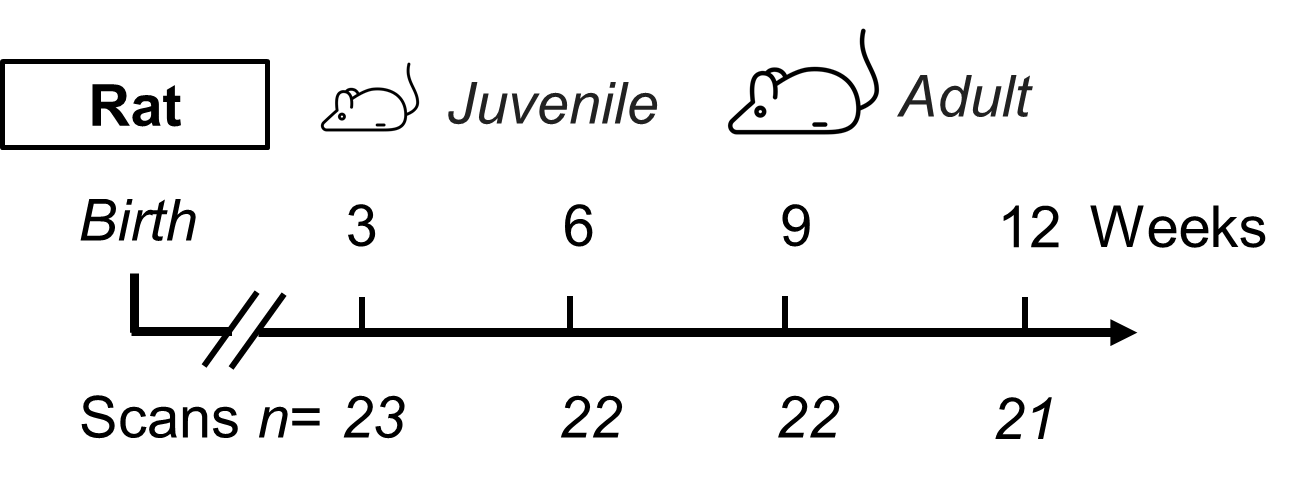

<a name="1.0"></a>
# 1.0 Install ANTs in Colab
ANTs installation guide: https://www.suyogjadhav.com/misc/2019/03/28/Using-ANTs-package-on-Google-Colaboratory/

Download and unzip ANTs file.

In [ ]:
!gdown 1N1Qx-R5tLCX5EhXPoPdyg6YvEkDtf-cD

Downloading...
From: https://drive.google.com/uc?id=1N1Qx-R5tLCX5EhXPoPdyg6YvEkDtf-cD
To: /content/ANTs-28-03-2019.7z
100% 316M/316M [00:02<00:00, 155MB/s]


In [ ]:
!7z x ANTs-28-03-2019.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 315597527 bytes (301 MiB)

Extracting archive: ANTs-28-03-2019.7z
--
Path = ANTs-28-03-2019.7z
Type = 7z
Physical Size = 315597527
Headers Size = 2380
Method = LZMA2:24 BCJ
Solid = +
Blocks = 1

  0%      0% 1 - bin/ANTS                   1% 1 - bin/ANTS                   1% 2 - bin/ANTSIntegrateVectorField                                       2% 2 - bin/ANTSIntegrateVectorField                                       2% 3 - bin/ANTSIntegrateVelocityField    

Now copy the entire contents of the newly created bin folder to /usr/local/bin/

In [ ]:
!cp bin/* /usr/local/bin

Test the installation by running:

(Note: this ANTs version on Colab doesn't provide antsRegistrationSyNQuick.sh.)

In [ ]:
!which antsRegistration
!antsRegistration --version

/usr/local/bin/antsRegistration
ANTs Version: 3.0.0.0.dev35-g68094
Compiled: Mar 28 2019 10:37:32



<a name="2.0"></a>
# 2.0 Download raw MRI data and BEN

Here we use one rat with the first name_id [1]. Each rat was scaned 4 times (adolescent rats (3, 6, 9, and 12 weeks old)).

[1] name_id: 

21d_cas_27_T2.nii.gz,

42d_cas_27_T2.nii.gz,

63d_cas_27_T2.nii.gz,

90d_cas_27_T2.nii.gz.


In [ ]:
!git clone https://github.com/yu02019/BEN.git

Cloning into 'BEN'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 170 (delta 6), reused 7 (delta 0), pack-reused 143
Receiving objects: 100% (170/170), 6.48 MiB | 30.84 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [ ]:
!gdown --id 1_M4wC8wHLWI776Hdkp2ktoNAE-cD7RMI
!unzip data_for_full_ants.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1_M4wC8wHLWI776Hdkp2ktoNAE-cD7RMI
To: /content/data_for_full_ants.zip
100% 630M/630M [00:04<00:00, 134MB/s]
Archive:  data_for_full_ants.zip
   creating: ANTs-sigma-afni2brain/
  inflating: ANTs-sigma-afni2brain/21d_cas_27_T2.nii.gz0GenericAffine.mat  
  inflating: ANTs-sigma-afni2brain/21d_cas_27_T2.nii.gz1InverseWarp.nii.gz  
  inflating: ANTs-sigma-afni2brain/42d_cas_27_T2.nii.gz0GenericAffine.mat  
  inflating: ANTs-sigma-afni2brain/42d_cas_27_T2.nii.gz1InverseWarp.nii.gz  
  inflating: ANTs-sigma-afni2brain/63d_cas27_T2.nii.gz0GenericAffine.mat  
  inflating: ANTs-sigma-afni2brain/63d_cas27_T2.nii.gz1InverseWarp.nii.gz  
  inflating: ANTs-sigma-afni2brain/90d_cas27_T2.nii.gz0GenericAffine.mat  
  inflating: AN

For scan '21d_cas_27_T2.nii.gz', antsRegistration will generate output files look like this:




| Filename                       | Use                                     |
|--------------------------------|-----------------------------------------|
| {name_id}_0GenericAffine.mat   | **<font color='#FF000'> Linear transform matrix </font>**                |
| {name_id}_1InverseWarp.nii.gz  | **<font color='#FF000'> Inverse nonlinear trans mat </font>**        |
| {name_id}_1Warp.nii.gz         | Nonlinear trans mat                     |
| {name_id}_InverseWarped.nii.gz | **Inverse** warped/transformed MRI scan |
| {name_id}_Warped.nii.gz        | Warped/transformed MRI scan             |


As registration takes long time for all data and different method pipelines (>48 hours), we provide inverse transformation matrix here (**<font color='#FF000'>red</font>** in Table), in order to transform atlas labels to native space.

These trans mat were acquired using following [command](#3.0). With these mat, we can also tranform label/mask/annotation/etc between two space bidirectionally. In other word, this is how to do atlas-based brain structure segmentation.

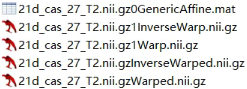

<a name="3.0"></a>

# 3.0 ANTs registration via **BEN interface**

Just using following commands via BEN's interface:




```
# python BEN/BEN_infer.py -i input_folder -o output_folder  # BEN skull stripping
python BEN/interface/python/utils_ants_os.py -i input_folder -o output_folder -ref fixed_image
python BEN/interface/python/utils_trans_os.py -i input_folder -o output_folder -ref fixed_image -mat trans_mat_folder
```
or use original ANTs
```
# 3dSkullStrip -input input_folder -orig_vol -prefix xxx -DAFNI_NIFTI_TYPE_WARN=YES  # BEN skull stripping
antsRegistration -d 3 -o 'test.nii.gz' -f 'Atlas-brain/SIGMA_InVivo_Brain_Template_Masked.nii.gz' -m 'pipeline-BEN-src/21d_cas_27_T2.nii.gz'
antsApplyTransforms -d 3 -i 'Atlas-brain/R2_SIGMA_Anatomical_Brain_Atlas.nii.gz' -r 'pipeline-BEN-src/21d_cas_27_T2.nii.gz' -n NearestNeighbor -t ['21d_cas_27_T2.nii.gz0GenericAffine.mat', 1] -t '21d_cas_27_T2.nii.gz1InverseWarp.nii.gz' -o 'output_trans.nii.gz'
```







In [ ]:
ls

ANTs-28-03-2019.7z      atlas_woSS/             pipeline-afni-src/
ANTs-sigma-afni2brain/  BEN/                    pipeline-BEN-src/
ANTs-sigma-brain/       bin/                    pipeline-woSkullStrip-src/
Atlas-brain/            data_for_full_ants.zip  sample_data/


<a name="3.1"></a>

## 3.1 BEN pipeline transform

In [ ]:
!python BEN/interface/python/utils_trans_os.py -i 'pipeline-BEN-src/*' -o 'Native-label-brain/' -ref 'Atlas-brain/R2_SIGMA_Anatomical_Brain_Atlas.nii.gz' -mat 'ANTs-sigma-brain/'

Creating new folder: Native-label-brain/
  0% 0/4 [00:00<?, ?it/s]21d_cas_27_T2.nii.gz
 25% 1/4 [00:01<00:05,  1.67s/it]42d_cas_27_T2.nii.gz
 50% 2/4 [00:03<00:03,  1.64s/it]63d_cas_27_T2.nii.gz
 75% 3/4 [00:04<00:01,  1.62s/it]90d_cas_27_T2.nii.gz
100% 4/4 [00:06<00:00,  1.61s/it]
Done!
total time: 7.46518874168396
avg time: 1.86629718542099


<a name="3.2"></a>
## 3.2 AFNI pipeline transform

In [ ]:
!python BEN/interface/python/utils_trans_os.py -i 'pipeline-afni-src/*' -o 'Native-label-afni-brain/' -ref 'Atlas-brain/R2_SIGMA_Anatomical_Brain_Atlas.nii.gz' -mat 'ANTs-sigma-afni2brain/'

Creating new folder: Native-label-afni-brain/
  0% 0/4 [00:00<?, ?it/s]21d_cas_27_T2.nii.gz
 25% 1/4 [00:01<00:04,  1.51s/it]42d_cas_27_T2.nii.gz
 50% 2/4 [00:03<00:03,  1.52s/it]63d_cas_27_T2.nii.gz
lose trans mat!
90d_cas_27_T2.nii.gz
lose trans mat!
100% 4/4 [00:03<00:00,  1.31it/s]
Done!
total time: 4.067110538482666
avg time: 1.0167776346206665


<a name="3.3"></a>

## 3.3 Visualization

In [ ]:
!pip install medpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 151 kB 5.2 MB/s 
     |████████████████████████████████| 48.4 MB 1.4 MB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp37-cp37m-linux_x86_64.whl size=754449 sha256=d2a1ec6af92ca1cc5cb7f936996aeea96a7b7ced7e7b5c906d53431c59d90a3e
  Stored in directory: /root/.cache/pip/wheels/b0/57/3a/da1183f22a6afb42e11138daa6a759de233fd977a984333602
Successfully built medpy


In [ ]:
cd BEN

/content/BEN


In [ ]:
import matplotlib.pyplot as plt
from utils.transparent_imshow import transp_imshow
from utils.visualization import load_slice

def plot_segmentation(raw, baseline, BEN, task, hspace=-0.7):
    fig = plt.figure(
        figsize=(16,9)
    )
    timepoint_count = raw.shape[0]

    for i in range(timepoint_count):
        plt.subplot(3, timepoint_count, i + 1)
        plt.imshow(raw[i], cmap='gray')
        plt.xticks([]), plt.yticks([])

    for i in range(timepoint_count):
        plt.subplot(3, timepoint_count, timepoint_count + i + 1)
        plt.imshow(raw[i], cmap='gray')
        transp_imshow(baseline[i], cmap='jet', alpha=0.6)
        plt.xticks([]), plt.yticks([])

    for i in range(timepoint_count):
        plt.subplot(3, timepoint_count, timepoint_count * 2 + i + 1)
        plt.imshow(raw[i], cmap='gray')
        transp_imshow(BEN[i], cmap='jet', alpha=0.6)
        plt.xticks([]), plt.yticks([])

    plt.subplots_adjust(hspace=hspace, wspace=0.0)
    fig.suptitle('Plot of different methods on cross-{} task'.format(task), fontsize=14)
    plt.show()

/content/BEN/utils/transparent_imshow.py:50: RuntimeWarning: invalid value encountered in true_divide
  color = (data-vmin)/(vmax-vmin)
/content/BEN/utils/transparent_imshow.py:53: RuntimeWarning: invalid value encountered in true_divide
  transparency = tmax*(data-tvmin)/(tvmax-tvmin)


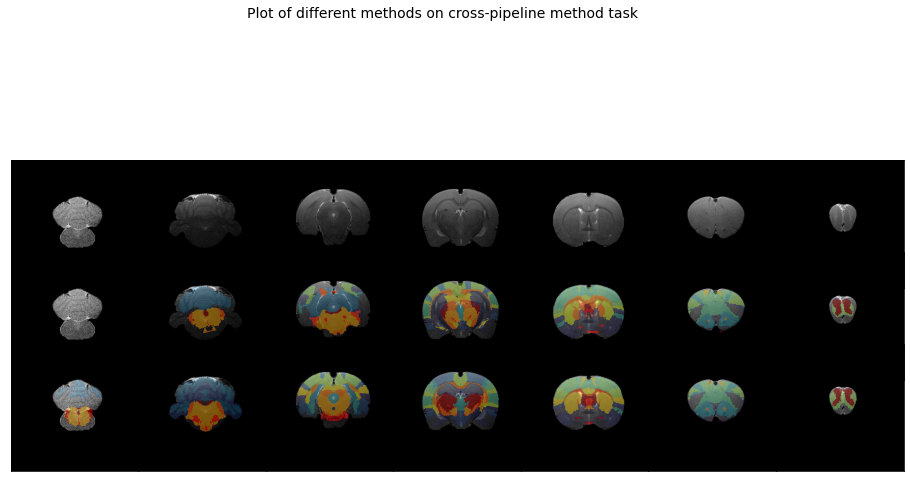

In [ ]:
raw, baseline, BEN = load_slice(r'../pipeline-BEN-src',
                  r'../Native-label-afni-brain/',
                  r'../Native-label-brain/',
                  scans_num=1)
plot_segmentation(raw, baseline, BEN, task='pipeline method', hspace=-0.7)

## Registration results:
From top raw to the third row: Raw image, AFNI pipeline, BEN pipeline.


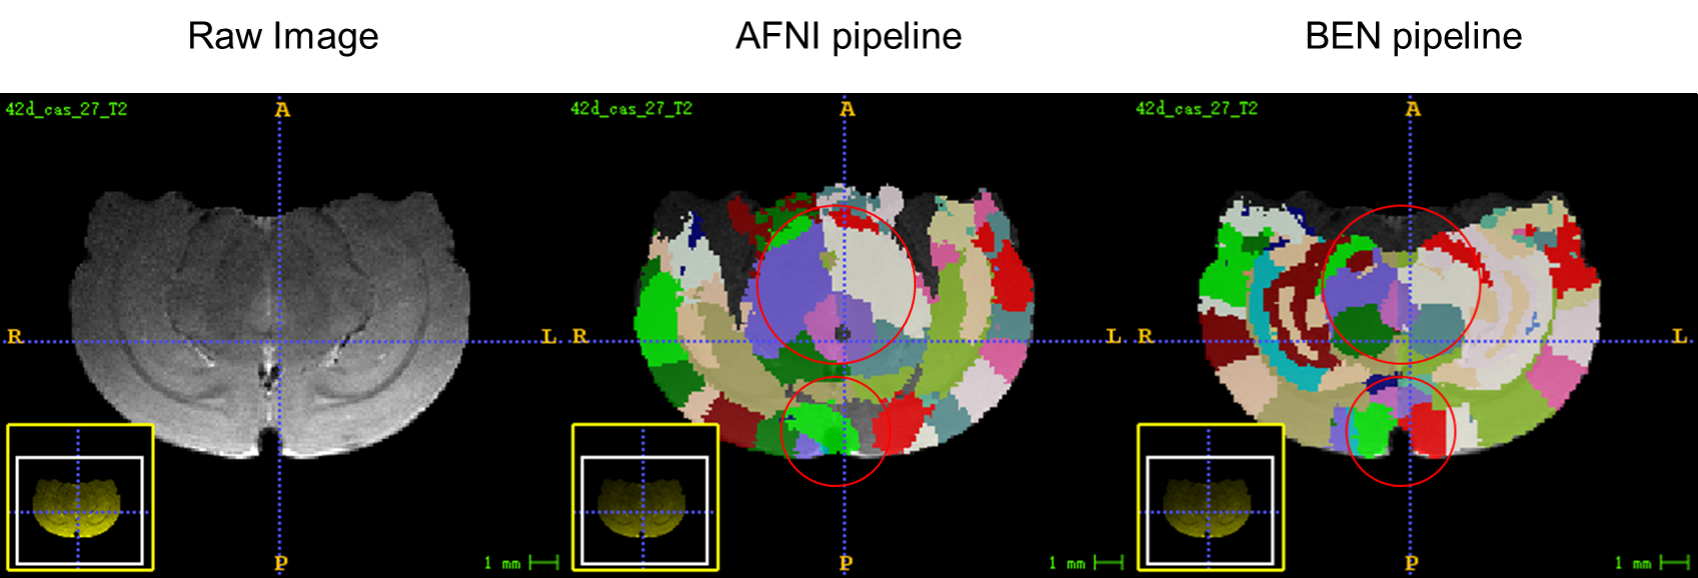

The **<font color='#FF000'>red circles</font>** circles indicate some representative brain regions after atlas registration. It can be seen that the results using BEN match the atlas, but using AFNI produce some errors.




<a name='4.0'  ></a>
# 4.0 Conclusion
BEN performs much better than using AFNI for the atlas registration, thus benifiting [volumetric quantifications](https://colab.research.google.com/drive/13oZcuAsJ4yQcZ5jGl5kYNV3DlW-eFgVB?usp=sharing).

<!-- using AFNI as preprocessing pipeline produces poor atlas registration resulting in the propagation of error to the volumetric quantifications -->